In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_df = pd.read_csv('../Resources/MoviesOnStreamingPlatforms_updated.csv')
movie_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df = movie_df[['Year', 'Age', 'IMDb', 'Rotten Tomatoes','Netflix', 'Hulu', 'Prime Video', 'Disney+','Genres','Runtime']]
df.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1256.000000


In [4]:
df.loc[df['Genres'].str.contains("Comedy",na=False),'Comedy_movie'] = 1
df['Comedy_movie'] = df['Comedy_movie'].fillna(0)
df['Comedy_movie'].head(10)

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Comedy_movie, dtype: float64

In [5]:
df['Age'] = df['Age'].str.replace(r'\D', '')
df['Age'] = df['Age'].replace(r'^\s*$', np.nan, regex=True)
df['Age'].value_counts()

18    3474
7     1462
13    1255
16     320
Name: Age, dtype: int64

In [6]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace(r'\D', '')
df['Rotten Tomatoes'].value_counts()

100    407
80     162
50     136
83     131
67     126
      ... 
28      10
7       10
4        9
2        4
3        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

In [7]:
df.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Runtime,Comedy_movie
0,2010,13,8.8,87,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller",148.0,0.0
1,1999,18,8.7,87,1,0,0,0,"Action,Sci-Fi",136.0,0.0
2,2018,13,8.5,84,1,0,0,0,"Action,Adventure,Sci-Fi",149.0,0.0
3,1985,7,8.5,96,1,0,0,0,"Adventure,Comedy,Sci-Fi",116.0,1.0
4,1966,18,8.8,97,1,0,1,0,Western,161.0,0.0


In [8]:
print(df.isnull().sum())
df = df.dropna(how='any')
print(df.isnull().sum())

Year                   0
Age                10233
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Genres               275
Runtime              592
Comedy_movie           0
dtype: int64
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Genres             0
Runtime            0
Comedy_movie       0
dtype: int64


In [9]:
df['Age'] = df['Age'].astype('int')
df['Age'].value_counts()

18    1711
13     680
7      606
16      96
Name: Age, dtype: int64

In [10]:
ml_data = df.copy()
data = ml_data.drop(['Genres','Comedy_movie'], axis = 1)
feature_names = data.columns
data.head(1)

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
0,2010,13,8.8,87,1,0,0,0,148.0


In [11]:
prediction = 'Comedy_movie'
X = np.array(ml_data.drop([prediction, 'Genres'],1))
Y = np.array(ml_data[prediction])

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25)

print(len(x_test))
print(len(x_train))

774
2319


In [13]:
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.6085271317829457

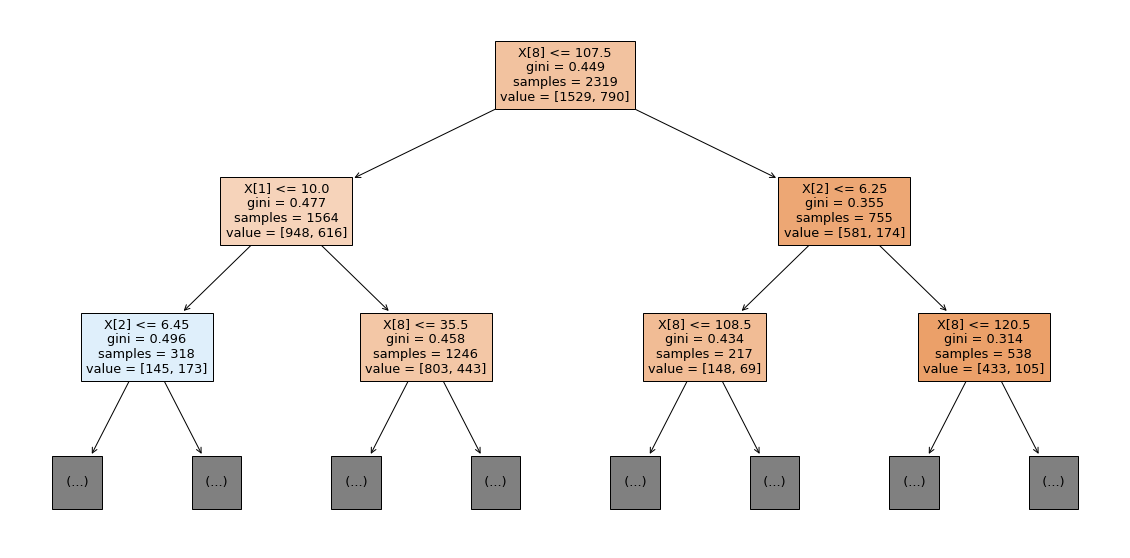

In [14]:
model_all_params = clf
plt.figure(figsize = (20,10))
plot_tree(model_all_params, max_depth = 2,
          filled=True      )
plt.savefig('../Images/comedy_tree.png')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6563307493540051

In [16]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Runtime            0.240179
Rotten Tomatoes    0.231084
IMDb               0.200278
Year               0.192829
Age                0.057280
Prime Video        0.024987
Netflix            0.022996
Hulu               0.019674
Disney+            0.010694
dtype: float64

No handles with labels found to put in legend.


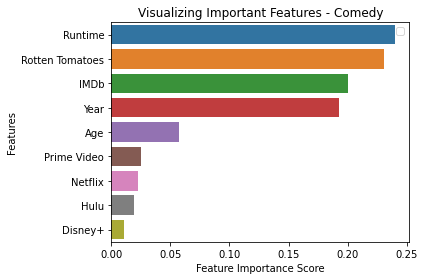

In [17]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Comedy")
plt.legend()
plt.tight_layout()
plt.savefig('../Images/comedy.png')
plt.show()